# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [4]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X,Y = load_diabetes(return_X_y=True)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [7]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

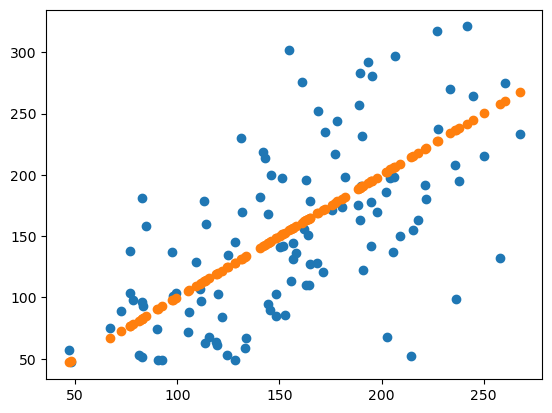

In [11]:
import matplotlib.pyplot as plt
plt.scatter(lr.predict(X_test),Y_test)
plt.scatter(lr.predict(X_test),lr.predict(X_test))

In [13]:
import numpy as np
MAE = np.mean(np.abs(Y_test - lr.predict(X_test)))
MAE

45.120563074396195

In [14]:
b = 346
a = 25
span = b-a
span

321

In [15]:
from Utils import epsilon_bounded

In [16]:
epsilon = epsilon_bounded(len(Y_test),span*2,0.05)
epsilon

82.75719699590479

In [17]:
[MAE-epsilon,MAE+epsilon]

[-37.6366339215086, 127.87776007030098]

# Wine quality dataset

In [18]:
import pandas as pd

In [21]:
df_red = pd.read_csv('/Users/avelin/Downloads/winequality-red.csv',sep=';')
df_white = pd.read_csv('/Users/avelin/Downloads/winequality-white.csv',sep=';')

In [23]:
df_red['type'] = 1

In [24]:
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [25]:
df_white['type'] = 0

In [26]:
feature_cols = [col for col in df_red.columns if col!='quality']

In [27]:
feature_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

In [28]:
target = 'quality'

In [29]:
X1 = df_red[feature_cols].to_numpy()
X2 = df_white[feature_cols].to_numpy()
Y1 = df_red[target].to_numpy()
Y2 = df_white[target].to_numpy()

In [30]:
X = np.concatenate([X1,X2],axis=0)
Y = np.concatenate([Y1,Y2],axis=0)

In [31]:
print(X.shape,Y.shape)

(6497, 12) (6497,)


In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

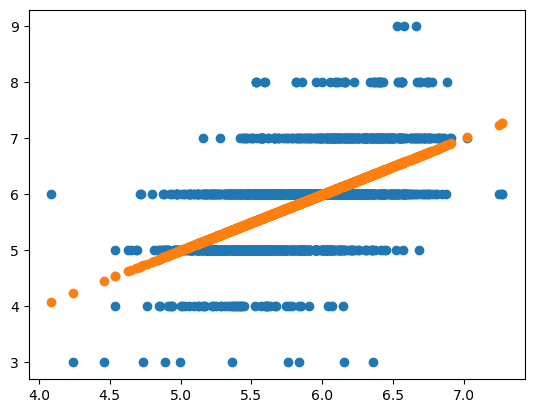

In [33]:
import matplotlib.pyplot as plt
plt.scatter(lr.predict(X_test),Y_test)
plt.scatter(lr.predict(X_test),lr.predict(X_test))

In [38]:
np.max(np.abs(Y_test-lr.predict(X_test)))

3.3587525442945037

In [34]:
import numpy as np
MAE = np.mean(np.abs(Y_test - lr.predict(X_test)))
MAE

0.5877140417627457

In [35]:
len(Y_test)

1625

In [39]:
epsilon = epsilon_bounded(len(Y_test),5,0.05)
epsilon

0.16845176105008947

In [40]:
[MAE-epsilon,MAE+epsilon]

[0.4192622807126562, 0.7561658028128351]